In [1]:
%matplotlib inline
import cartopy.feature
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import mw_protocol.saving as saving
import seaborn as sns

In [2]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
# To change for your personal folder
script_folder = "/nfs/see-fs-01_users/eeymr/work/scripts/mw_protocol/"

# Demonstration saving algorithm

**Objective** : Save routed discharge data_array to a netcdf dataset. Operations : 
- Create a netcdf dataset from a discharge array, a lsm and options.
- Transform an existing dataset to modify its options and save it.
- Save as a waterfix.

## Main method

From a m3/s spread output, we only recommend to convert the output to kg.m-2.s-1 and to add a surface depth coordinate. But in some cases it may be necessary to convert the output into a waterfix - convert to kg.m-2.s-1, loop the longitudes, add a depth coordinate and rename the dischare to field672.

In [4]:
ds_discharge = xr.open_dataset(f"{script_folder}/outputs/sample_spread_discharge.nc", decode_times=False)
ds_lsm = xr.open_dataset(f"{script_folder}/data/ice6g.omask.nc")
ds_discharge

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 ...
Attributes:
    title:                SPREAD MELTWATER DISCHARGE
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created 2022-12-09 14:52:14.023401 by Yvan Romé

### Creating ancil

In [5]:
saving.discharge_to_ancil(ds_discharge, ds_lsm)

__ Converting discharge to ancil
____ Converting m3/s to kg/m2/s
____ Adding depth coordinate
____ Masking land-sea mask


<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 288, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * depth      (depth) float64 5.0
Data variables:
    discharge  (t, depth, latitude, longitude) float64 nan nan nan ... nan nan
Attributes:
    title:                Spread meltwater + waterfix mask for transient last...
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created on 14/12/2022 19:57:11 by Yvan Malo Romé
    lsm:                  ICE6G_21k

In [6]:
saving.ancil_to_discharge(saving.discharge_to_ancil(ds_discharge, ds_lsm))

__ Converting discharge to ancil
____ Converting m3/s to kg/m2/s
____ Adding depth coordinate
____ Masking land-sea mask
__ Converting ancil to discharge
____ Converting kg/m2/s to m3/s
____ Removing depth coordinate
____ Unmasking land-sea mask


<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:                Spread meltwater + waterfix mask for transient last...
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created on 14/12/2022 19:57:11 by Yvan Malo Romé
    lsm:                  None

### Creating waterfix



In [7]:
saving.discharge_to_waterfix(ds_discharge)

__ Converting discharge to waterfix
____ Converting m3/s to kg/m2/s
____ looping longitude
____ Adding depth coordinate


<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 290, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 357.5 358.8 360.0 361.2
  * depth      (depth) float64 5.0
Data variables:
    field672   (t, depth, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 0.0
Attributes:
    title:                SPREAD MELTWATER DISCHARGE
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created 2022-12-09 14:52:14.023401 by Yvan Romé

In [8]:
saving.waterfix_to_discharge(saving.discharge_to_waterfix(ds_discharge))

__ Converting discharge to waterfix
____ Converting m3/s to kg/m2/s
____ looping longitude
____ Adding depth coordinate
__ Converting waterfix to discharge
____ Converting kg/m2/s to m3/s
____ unlooping longitude
____ Removing depth coordinate


<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:                SPREAD MELTWATER DISCHARGE
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created 2022-12-09 14:52:14.023401 by Yvan Romé

## Individual methods

In [9]:
ds_input = xr.open_dataset(f"{script_folder}/outputs/sample_spread_discharge.nc", decode_times=False)
ds_input

<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 ...
Attributes:
    title:                SPREAD MELTWATER DISCHARGE
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created 2022-12-09 14:52:14.023401 by Yvan Romé

### Convert to kg/m2/s

In [10]:
saving.m3s_to_kgm2s(ds_input)

____ Converting m3/s to kg/m2/s


<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:                SPREAD MELTWATER DISCHARGE
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created 2022-12-09 14:52:14.023401 by Yvan Romé

In [11]:
saving.kgm2s_to_m3s(saving.m3s_to_kgm2s(ds_input))

____ Converting m3/s to kg/m2/s
____ Converting kg/m2/s to m3/s


<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:                SPREAD MELTWATER DISCHARGE
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created 2022-12-09 14:52:14.023401 by Yvan Romé

### Loop longitude

In [12]:
saving.loop_longitude(ds_input)

____ looping longitude


<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 290, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 357.5 358.8 360.0 361.2
Data variables:
    discharge  (t, latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:                SPREAD MELTWATER DISCHARGE
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created 2022-12-09 14:52:14.023401 by Yvan Romé

In [13]:
saving.unloop_longitude(saving.loop_longitude(ds_input))

____ looping longitude
____ unlooping longitude


<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float64 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:                SPREAD MELTWATER DISCHARGE
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created 2022-12-09 14:52:14.023401 by Yvan Romé

### Crop years

In [14]:
saving.crop_years(ds_input, -26000,-25700)

____ Cropping years


<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 4)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:                SPREAD MELTWATER DISCHARGE
    start_year:           -26000
    end_year:             -25700
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created 2022-12-09 14:52:14.023401 by Yvan Romé

In [15]:
# To create a meltwater snapshot
saving.crop_years(ds_input, -25800,-25800)

____ Cropping years


<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 1)
Coordinates:
  * t          (t) int64 -25800
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:                SPREAD MELTWATER DISCHARGE
    start_year:           -25800
    end_year:             -25800
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created 2022-12-09 14:52:14.023401 by Yvan Romé

### Multiply step

In [16]:
saving.multiply_steps(ds_input, 2)

____ Multiplying time steps


<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 3)
Coordinates:
  * t          (t) int64 -26000 -25800 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:                SPREAD MELTWATER DISCHARGE
    start_year:           -26000
    end_year:             -25600
    step:                 200
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created 2022-12-09 14:52:14.023401 by Yvan Romé

### Add/Remove depth coordinate

In [17]:
saving.add_depth(ds_input)

____ Adding depth coordinate


<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 288, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
  * depth      (depth) float64 5.0
Data variables:
    discharge  (t, depth, latitude, longitude) float64 0.0 0.0 0.0 ... 0.0 0.0
Attributes:
    title:                SPREAD MELTWATER DISCHARGE
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created 2022-12-09 14:52:14.023401 by Yvan Romé

In [18]:
saving.remove_depth(saving.add_depth(ds_input))

____ Adding depth coordinate
____ Removing depth coordinate


<xarray.Dataset>
Dimensions:    (latitude: 144, longitude: 288, t: 5)
Coordinates:
  * t          (t) int64 -26000 -25900 -25800 -25700 -25600
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    title:                SPREAD MELTWATER DISCHARGE
    start_year:           -26000
    end_year:             -25600
    step:                 100
    mode_lon:             double
    mode_shape:           cross
    running_mean_period:  0
    ice_sheet:            GLAC-1D
    waterfix:             GLAC-1D
    history:              Created 2022-12-09 14:52:14.023401 by Yvan Romé

### Mask land_sea_mask

In [19]:
ds_lsm = xr.open_dataset(f"{script_folder}/data/temev.qrparm.omask.nc")
ds_lsm

<xarray.Dataset>
Dimensions:     (latitude: 144, longitude: 288)
Coordinates:
  * longitude   (longitude) float32 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude    (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
Data variables:
    lsm         (latitude, longitude) float32 ...
    depthlevel  (latitude, longitude) float32 ...
    depthdepth  (latitude, longitude) float32 ...
Attributes:
    title:    Produced using writenc6 program by PJV
    name:     GLAC-1D_21k

____ Masking land-sea mask


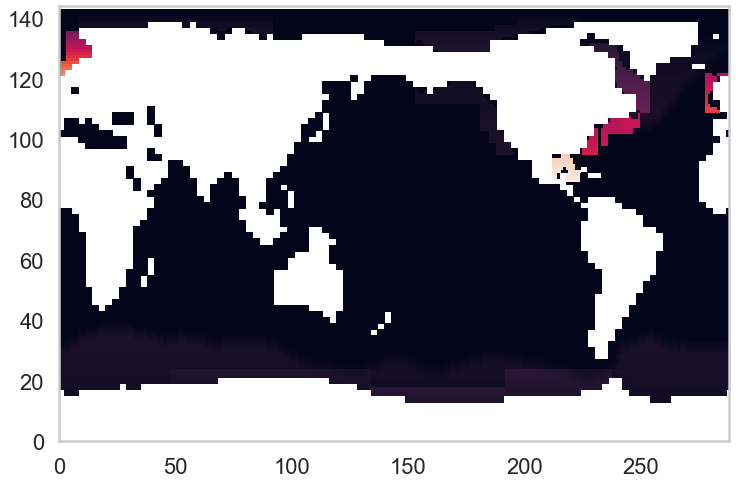

In [20]:
plt.pcolormesh(saving.mask_lsm(ds_input, ds_lsm).discharge[0])

____ Masking land-sea mask
____ Unmasking land-sea mask


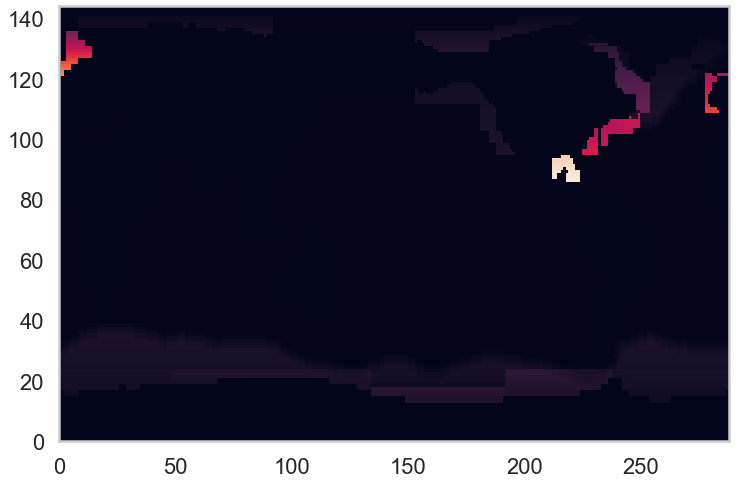

In [21]:
plt.pcolormesh(saving.unmask_lsm(saving.mask_lsm(ds_input, ds_lsm)).discharge[0])

### Add lsm name

In [22]:
ds_lsm = xr.open_dataset(f"{script_folder}/data/ice6g.omask.nc")
ds_lsm

<xarray.Dataset>
Dimensions:     (latitude: 144, longitude: 288)
Coordinates:
  * longitude   (longitude) float32 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude    (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
Data variables:
    lsm         (latitude, longitude) int32 ...
    depthlevel  (latitude, longitude) float64 ...
    depthdepth  (latitude, longitude) float64 ...
Attributes:
    title:    Produced using mw_protocol by Olnavy from temp file
    name:     ICE6G_21k

In [23]:
saving.add_lsm_name(ds_lsm, "ICE6G_21k")

<xarray.Dataset>
Dimensions:     (latitude: 144, longitude: 288)
Coordinates:
  * longitude   (longitude) float32 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude    (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
Data variables:
    lsm         (latitude, longitude) int32 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    depthlevel  (latitude, longitude) float64 nan nan nan nan ... nan nan nan
    depthdepth  (latitude, longitude) float64 nan nan nan nan ... nan nan nan
Attributes:
    title:    Produced using mw_protocol by Olnavy from temp file
    name:     ICE6G_21k

## Templates

In [24]:
# Templates

# xr.open_dataset("/nfs/see-fs-01_users/eeymr/my_ancil/HadCM3/xoup/xoup.wfix.glac_ts.shift.nc", decode_times=False)
# xr.open_dataset("/nfs/see-fs-01_users/eeymr/my_ancil/HadCM3/xoup/xoup.wfix.glac_21_0.shift.nc", decode_times=False)
# xr.open_dataset("/nfs/see-fs-01_users/eeymr/my_ancil/HadCM3/GLAC1D_DEGLAC/tsmw.wfix.GLAC1D_H1s.nc", decode_times=False)
# xr.open_dataset("/nfs/see-fs-01_users/eeymr/my_ancil/HadCM3/xoup/xoup.wfix.lgm.nc", decode_times=False)
# xr.open_dataset("/nfs/see-fs-01_users/eeymr/my_ancil/HadCM3/xpfj/xpfj.wfix.ice6g_ts.shift.nc", decode_times=False)
template = xr.open_dataset("/nfs/see-fs-01_users/eeymr/work/data/ice6g_hs1/routed_meltwater/HS1_ICE6GC_fwf-plume.nc", decode_times=False)
# template = xr.open_dataset(f"{script_folder}/data/template_discharge.nc", decode_times=False)
template

<xarray.Dataset>
Dimensions:    (depth: 1, latitude: 144, longitude: 288, t: 12)
Coordinates:
  * t          (t) int32 21000 20500 20000 19500 ... 17000 16500 16000 15500
  * depth      (depth) float32 5.0
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 355.0 356.2 357.5 358.8
Data variables:
    discharge  (t, latitude, longitude) float32 ...
Attributes:
    Conventions:               CF-1.0
    title:                     waterfix for transient last deglaciation HadCM...
    history:                   Wed Jul  4 11:39:59 2018: ncrename -v field672...
    NCO:                       "4.6.1"
    nco_openmp_thread_number:  1

In [25]:
template.discharge.values

array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [nan, nan, nan, ..., nan, nan, nan]],

       ...,

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan

## Creating an ocean mask

In [26]:
ds_glac = xr.open_dataset(f"{script_folder}/data/sample/xpfjdo#da000078800c1+.nc").temp.isel(t=0).drop('t')
ds_ice6g = xr.open_dataset(f"{script_folder}/data/sample/xpfjbo#da000078800c1+.nc").temp.isel(t=0).drop('t')

ds_glac

<xarray.DataArray 'temp' (depth: 20, latitude: 144, longitude: 290)>
[835200 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 1.25 2.5 3.75 ... 357.5 358.8 360.0 361.2
  * latitude   (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
  * depth      (depth) float32 5.0 15.0 25.0 ... 3.962e+03 4.577e+03 5.192e+03
Attributes:
    source:         Unified Model Output (Vn 4.5):
    name:           temp
    title:          POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    date:           20/01/80
    time:           10:00
    long_name:      POTENTIAL TEMPERATURE (OCEAN)  DEG.C
    standard_name:  sea_water_potential_temperature
    units:          degC
    valid_min:      -12.193005
    valid_max:      33.994587

In [27]:
omask_ice6g = saving.create_omask(ds_ice6g)
omask_ice6g = saving.unloop_longitude(omask_ice6g)  # In case there are two more longitude coordinates
omask_ice6g

____ unlooping longitude


<xarray.Dataset>
Dimensions:     (latitude: 144, longitude: 288)
Coordinates:
  * longitude   (longitude) float32 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude    (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
Data variables:
    lsm         (latitude, longitude) int64 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1
    depthlevel  (latitude, longitude) float64 nan nan nan nan ... nan nan nan
    depthdepth  (latitude, longitude) float64 nan nan nan nan ... nan nan nan
Attributes:
    title:    Produced using mw_protocol by Olnavy from temp file

In [28]:
omask_glac = xr.open_dataset(f"{script_folder}/data/temev.qrparm.omask.nc")
omask_glac

<xarray.Dataset>
Dimensions:     (latitude: 144, longitude: 288)
Coordinates:
  * longitude   (longitude) float32 0.0 1.25 2.5 3.75 ... 356.2 357.5 358.8
  * latitude    (latitude) float32 -89.38 -88.12 -86.88 ... 86.88 88.12 89.38
Data variables:
    lsm         (latitude, longitude) float32 ...
    depthlevel  (latitude, longitude) float32 ...
    depthdepth  (latitude, longitude) float32 ...
Attributes:
    title:    Produced using writenc6 program by PJV
    name:     GLAC-1D_21k

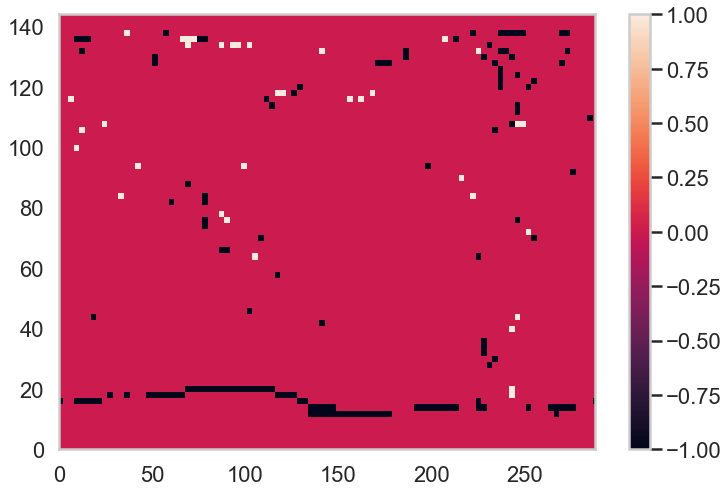

In [29]:
plt.pcolormesh(omask_ice6g.lsm - omask_glac.lsm)
plt.colorbar()

0.0


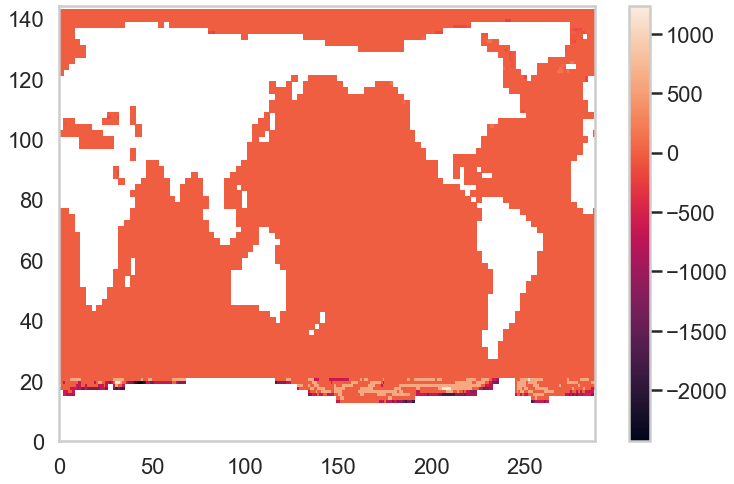

In [30]:
print(np.nanmedian(omask_ice6g.depthdepth - omask_glac.depthdepth))
plt.pcolormesh(omask_ice6g.depthdepth - omask_glac.depthdepth)
plt.colorbar()

In [31]:
# omask_ice6g.to_netcdf(f"{script_folder}/data/ice6g.omask.nc")